## Load and Examine Data

In [12]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.gridspec as gridspec
import os

In [2]:
import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=True, resize_pics=(64,64))

In [4]:
Y[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.]])

In [3]:
print X.shape
print Y.shape

(1360, 64, 64, 3)
(1360, 17)


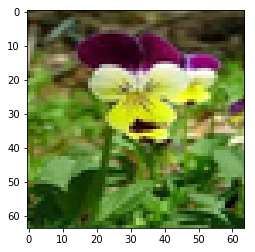

In [4]:
plt.imshow(X[30])

## GAN

In [6]:
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(64, 64, 3))

    return fig



In [7]:
mb_size = 16
X = X.reshape([-1, 12288])
def xavier_init(size):
    return tf.random_normal(shape=size, stddev=(1. / tf.sqrt(size[0] / 2.)))

def generator(z):
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_log_prob = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.nn.sigmoid(G_log_prob)

    return G_prob


def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    D_logit = tf.matmul(D_h1, D_W2) + D_b2
    D_prob = tf.nn.sigmoid(D_logit)

    return D_prob, D_logit

# Discriminator Net
X_ph = tf.placeholder(tf.float32, shape=[None, 12288], name='X')
#X_tf = tf.convert_to_tensor(X, tf.float32)
#tf.reshape(X_tf, [-1, 2352])
#X_mb = tf.train.batch([X_ph], mb_size, enqueue_many = True)

D_W1 = tf.Variable(xavier_init([12288, 128]), name='D_W1')
D_b1 = tf.Variable(tf.zeros(shape=[128]), name='D_b1')

D_W2 = tf.Variable(xavier_init([128, 1]), name='D_W2')
D_b2 = tf.Variable(tf.zeros(shape=[1]), name='D_b2')

theta_D = [D_W1, D_W2, D_b1, D_b2]

# Generator Net
Z_ph = tf.placeholder(tf.float32, shape=[None, 100], name='Z')

G_W1 = tf.Variable(xavier_init([100, 1024]), name='G_W1')
G_b1 = tf.Variable(tf.zeros(shape=[1024]), name='G_b1')

G_W2 = tf.Variable(xavier_init([1024, 12288]), name='G_W2')
G_b2 = tf.Variable(tf.zeros(shape=[12288]), name='G_b2')

theta_G = [G_W1, G_W2, G_b1, G_b2]

G_sample = generator(Z_ph)
D_real, D_logit_real = discriminator(X_ph)
D_fake, D_logit_fake = discriminator(G_sample)

D_loss = -tf.reduce_mean(tf.log(D_real) + tf.log(1. - D_fake))
G_loss = -tf.reduce_mean(tf.log(D_fake))

# Only update D(X)'s parameters, so var_list = theta_D
D_solver = tf.train.AdamOptimizer(0.00005).minimize(D_loss, var_list=theta_D)
# Only update G(X)'s parameters, so var_list = theta_G
G_solver = tf.train.AdamOptimizer(0.0002).minimize(G_loss, var_list=theta_G)

def sample_Z(m, n):
    '''Uniform prior for G(Z)'''
    return np.random.uniform(-1., 1., size=[m, n])



Iter: 0
D loss: 1.423
G_loss: 0.5649
()


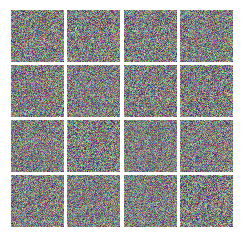

Iter: 1000
D loss: 0.9458
G_loss: 1.399
()


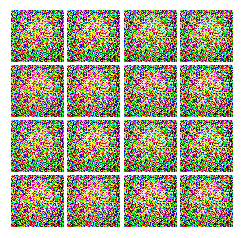

Iter: 2000
D loss: 0.9502
G_loss: 1.355
()


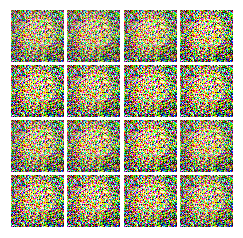

Iter: 3000
D loss: 0.8562
G_loss: 1.442
()


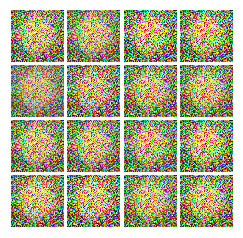

Iter: 4000
D loss: 1.393
G_loss: 1.008
()


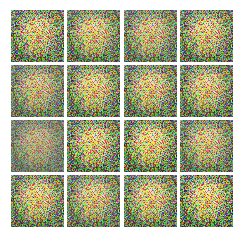

Iter: 5000
D loss: 2.272
G_loss: 0.6808
()


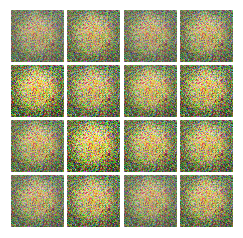

Iter: 6000
D loss: 1.189
G_loss: 0.8945
()


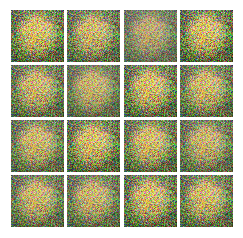

Iter: 7000
D loss: 1.357
G_loss: 0.9489
()


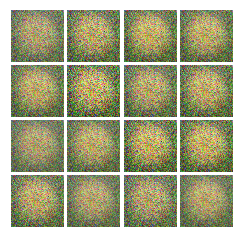

Iter: 8000
D loss: 1.077
G_loss: 1.09
()


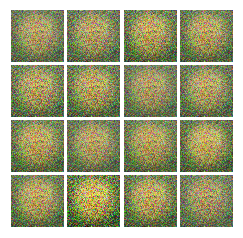

Iter: 9000
D loss: 1.644
G_loss: 0.7297
()


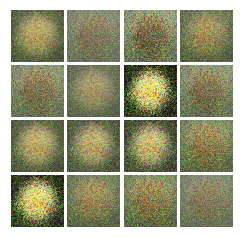

Iter: 10000
D loss: 1.21
G_loss: 0.8884
()


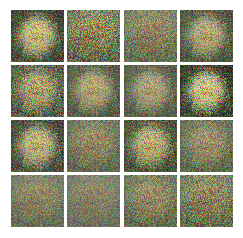

Iter: 11000
D loss: 1.412
G_loss: 0.8389
()


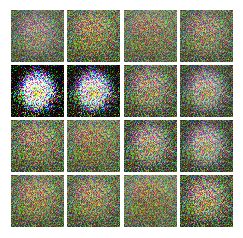

Iter: 12000
D loss: 1.524
G_loss: 0.7965
()


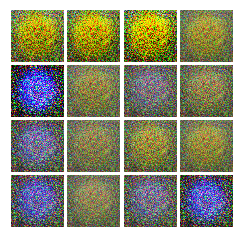

Iter: 13000
D loss: 1.08
G_loss: 0.9593
()


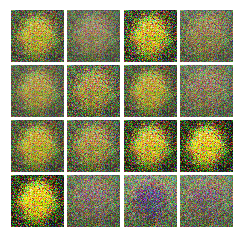

Iter: 14000
D loss: 1.235
G_loss: 0.9673
()


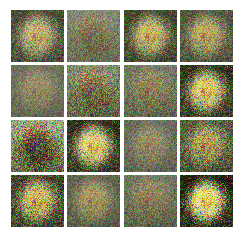

Iter: 15000
D loss: 1.362
G_loss: 0.9055
()


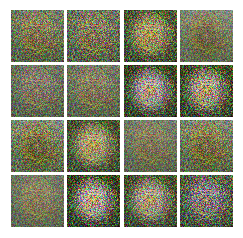

Iter: 16000
D loss: 1.388
G_loss: 0.8669
()


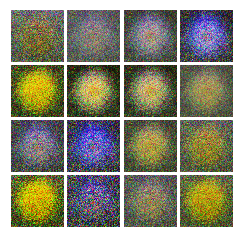

Iter: 17000
D loss: 1.62
G_loss: 0.5786
()


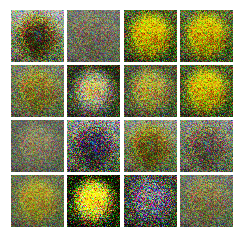

Iter: 18000
D loss: 1.284
G_loss: 0.79
()


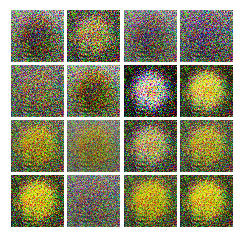

Iter: 19000
D loss: 1.29
G_loss: 0.8311
()


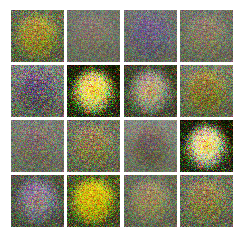

Iter: 20000
D loss: 1.508
G_loss: 0.5835
()


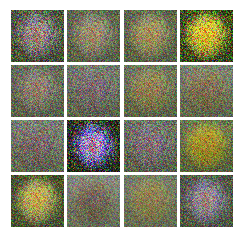

Iter: 21000
D loss: 1.566
G_loss: 0.7192
()


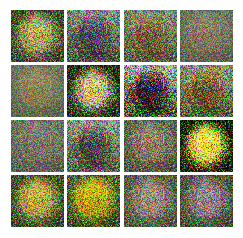

Iter: 22000
D loss: 1.351
G_loss: 0.735
()


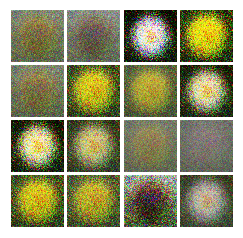

Iter: 23000
D loss: 1.318
G_loss: 0.7585
()


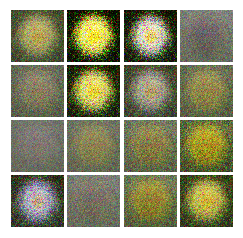

Iter: 24000
D loss: 1.256
G_loss: 0.67
()


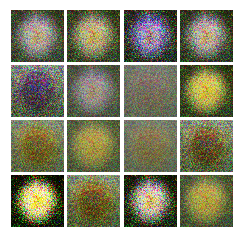

Iter: 25000
D loss: 1.224
G_loss: 0.8617
()


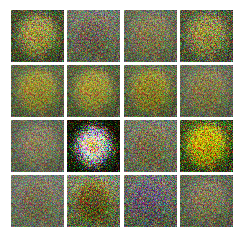

Iter: 26000
D loss: 1.24
G_loss: 0.7208
()


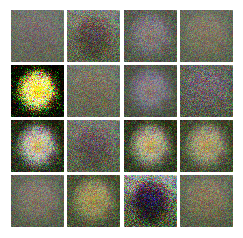

Iter: 27000
D loss: 1.451
G_loss: 0.524
()


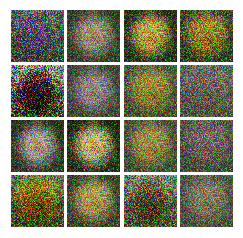

Iter: 28000
D loss: 1.551
G_loss: 0.5774
()


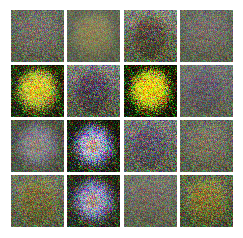

Iter: 29000
D loss: 1.422
G_loss: 0.6893
()


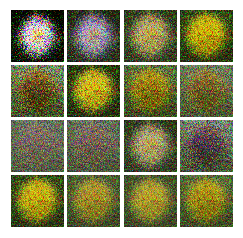

Iter: 30000
D loss: 1.305
G_loss: 0.7303
()


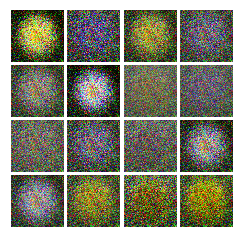

Iter: 31000
D loss: 1.39
G_loss: 0.6824
()


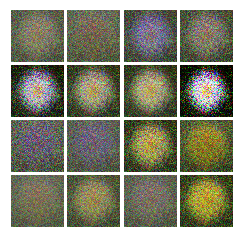

Iter: 32000
D loss: 1.46
G_loss: 0.6454
()


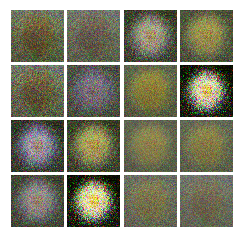

Iter: 33000
D loss: 1.398
G_loss: 0.6763
()


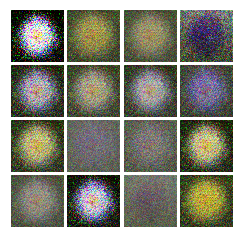

Iter: 34000
D loss: 1.531
G_loss: 0.5713
()


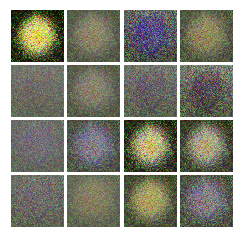

Iter: 35000
D loss: 1.262
G_loss: 0.7355
()


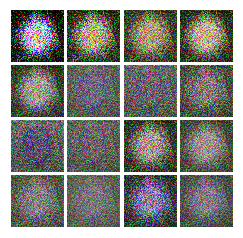

Iter: 36000
D loss: 1.318
G_loss: 0.7822
()


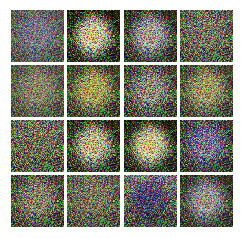

Iter: 37000
D loss: 1.169
G_loss: 0.8198
()


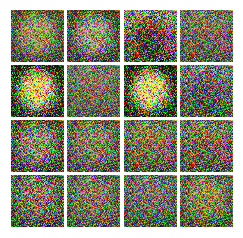

Iter: 38000
D loss: 1.237
G_loss: 0.814
()


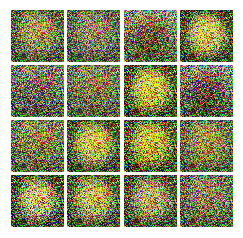

Iter: 39000
D loss: 1.279
G_loss: 0.7849
()


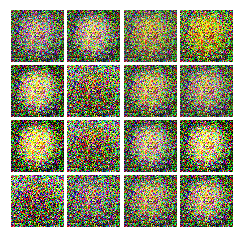

Iter: 40000
D loss: 1.124
G_loss: 0.9479
()


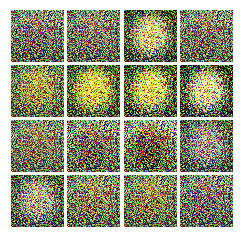

Iter: 41000
D loss: 0.9357
G_loss: 1.131
()


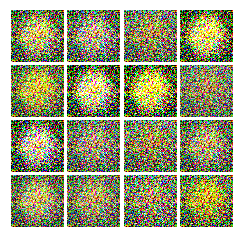

Iter: 42000
D loss: 1.047
G_loss: 1.096
()


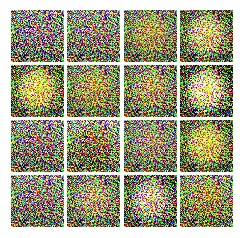

KeyboardInterrupt: 

In [13]:
Z_dim = 100
first = 0

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess.run(tf.global_variables_initializer())

if not os.path.exists('out/'):
    os.makedirs('out/')

i = 0

D_loss_c = []
G_loss_c = []

for it in range(1000000):
    if (first+mb_size <= len(X)) :
        x_input = X[first: first+mb_size, ]
    else :
        x_input = X[first: len(X), ]
        first = (first + mb_size) % len(X)
        x_input = np.append(x_input, X[0: first, ]).reshape([-1, 12288])

    
    first += mb_size

    _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X_ph: x_input, Z_ph: sample_Z(mb_size, Z_dim)})
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z_ph: sample_Z(mb_size, Z_dim)})
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z_ph: sample_Z(mb_size, Z_dim)})
    
    if it % 1000 == 0:
        print('Iter: {}'.format(it))
        print('D loss: {:.4}'. format(D_loss_curr))
        print('G_loss: {:.4}'.format(G_loss_curr))
        print()
        D_loss_c.append(D_loss_curr)
        G_loss_c.append(G_loss_curr)
    if it % 1000 == 0:
        samples = sess.run(G_sample, feed_dict={Z_ph: sample_Z(16, Z_dim)})
        fig = plot(samples)
        plt.savefig('out/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
        i += 1
        plt.show(fig)

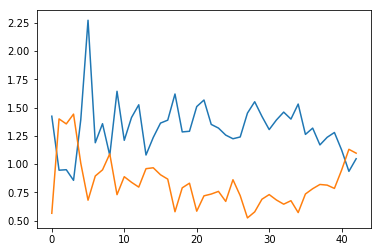

In [14]:
plt.plot(D_loss_c)
plt.plot(G_loss_c)
plt.show()